The project aims to identify customers who are likely to stop using a telecom company's services. Each customer is assigned a score indicating their likelihood of churning. Based on this data, the company will send emails offering discounts or other promotions to encourage continued use of the service.

The machine learning (ML) strategy applied to address this issue is binary classification.
g(x_i) = y_i
In the formula, y_i is the model's prediction and belongs to {0, 1}. 0 represents the negative value, or no churning, and 1 represents the positive value, or churning. The output corresponds to the likelihood of churning.

31. Data preparation
- Download the data, read it with pandas
- Look at the data
- Make column names and values look uniform
- Checking if all the columns read correctly
- Checking if the churm variable needs any preparation

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'
# !wget $data -O data_churm_project.csv

In [ ]:
df = pd.read_csv('data_churm_project.csv')
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [4]:
df.columns = df.columns.str.lower().str.replace(' ','_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c]= df[c].str.lower().str.replace(' ','_')

In [5]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors = 'coerce')
df.totalcharges = df.totalcharges.fillna(df.totalcharges.mean()) #Fill missing value by mean

In [6]:
df.churn = (df.churn =='yes').astype(int) #change all yes to 1 and no to 0

In [7]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


3.2 Setting up the validation framework

In [8]:
from sklearn.model_selection import train_test_split
#Perform the train/validation/test split with Scikit-Learn

In [9]:
df_full_train, df_test= train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val= train_test_split(df_full_train, test_size=0.25, random_state=1)

In [10]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [11]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [12]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

3.3 EDA
- Check missing values
- Look at the target variable (churn)
- Look at numerical and categorical variables

In [13]:
df_full_train = df_full_train.reset_index(drop=True)

In [14]:
df_full_train.churn.value_counts(normalize=True)
#with out argument it shows the number of each values
#with parameters normalize it divide the number of each values by the len of df_full_train

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [15]:
global_churn_rate=  df_full_train.churn.mean()
# it shows the global churn rate
# equal to number of 1 dived by len, like the previous one
round(global_churn_rate, 2)

np.float64(0.27)

In [16]:
numerical =['tenure','monthlycharges','totalcharges' ]

In [17]:

categorical = [ 'gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice',
                'multiplelines', 'internetservice','onlinesecurity', 'onlinebackup',
                'deviceprotection', 'techsupport','streamingtv', 'streamingmovies',
                'contract', 'paperlessbilling','paymentmethod']

In [18]:
#select a subset from de date frame
# check the number of unique values
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

3.4 Feature importance: Churn rate and risk ratio

In [19]:
#calculate the mean of female person that churn
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

np.float64(0.27682403433476394)

In [20]:
#calculate the mean of male person that churn
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

np.float64(0.2632135306553911)

In [21]:
#calculate the mean of person with partner that churn
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

np.float64(0.20503330866025166)

In [22]:
#calculate the mean of person with no partner that churn
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

np.float64(0.3298090040927694)

Difference:
Values for this difference smaller than 0 indicate a higher likelihood to churn, while values larger than 0 indicate a lower likelihood to churn.

In [23]:
churn_female - global_churn_rate

np.float64(0.006855983216553063)

In [24]:
churn_male - global_churn_rate

np.float64(-0.006754520462819769)

-->The gender don't have no risk to churn

In [25]:
churn_partner -global_churn_rate

np.float64(-0.06493474245795922)

In [26]:
churn_no_partner - global_churn_rate

np.float64(0.05984095297455855)

--> The person With no partner are likely to churn 5% more than the average

Risk ratio

In [27]:
churn_no_partner / global_churn_rate

np.float64(1.2216593879412643)

In [28]:
churn_partner / global_churn_rate

np.float64(0.7594724924338315)

--> the preson with partner are less churning

SELECT
    gender,
    AVG(churn),
    AVG(churn) - global_churn AS diff,
    AVG(churn) / global_churn AS risk
FROM
    data
GROUP BY
    gender;

In [29]:
from IPython.display import display

In [30]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean','count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group)
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980



seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208



partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472



dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651



phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412



multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948



internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201



onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570



onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660



deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480



techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390



streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328



streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182



contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730



paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560



paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


3.5 Feature importance: Mutual information

Mutual information is a concept from information theory. It tells us how much we can learn about one variable. It tells us this if we know the value of another.

In [31]:
from sklearn.metrics import mutual_info_score

In [32]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [33]:
mutual_info_score(df_full_train.churn, df_full_train.partner)

0.009967689095399745

In [34]:
def mutual_info_churn_score(series):
    return mutual_info_score(series,df_full_train.churn)

In [35]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending = False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

The ML model is working on the categorical variable with high mutual info churn score higher.

3.6 Feature importance: Correlation

The correlation coefficient measures the degree of dependency between two variables. If one variable grows while the other decreases, the value is negative; if both variables increase, the value is positive. Depending on the size of the correlation coefficient, the dependency between the two variables could be low, moderate or strong. It enables the importance of numerical variables to be measured.

In [36]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.197365
dtype: float64

Interpretation:the more the tenure increase the less person churn the company.

In [37]:
df_full_train[(df_full_train.tenure<=2)].churn.mean()

np.float64(0.5953420669577875)

In [38]:
df_full_train[(df_full_train.tenure>2) & (df_full_train.tenure<=12)].churn.mean()

np.float64(0.3994413407821229)

In [39]:
df_full_train[(df_full_train.tenure>12)].churn.mean()

np.float64(0.17634908339788277)

In [40]:
df_full_train[(df_full_train.monthlycharges<=20)].churn.mean()

np.float64(0.08795411089866156)

In [41]:
df_full_train[(df_full_train.monthlycharges>20) & (df_full_train.monthlycharges<=50)].churn.mean()

np.float64(0.18340943683409436)

In [42]:
df_full_train[(df_full_train.monthlycharges>50)].churn.mean()

np.float64(0.32499341585462205)

For the tenure it's a negative correlation for the monthlycharges it's positive correlation.


In [43]:
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.197365
dtype: float64

3.7 One-hot encoding

One-Hot Encoding allows encoding categorical variables in numerical ones. 
Scikit-Learn is used to encode categorical features.

In [44]:
from sklearn.feature_extraction import DictVectorizer

In [60]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [61]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [62]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [63]:
X_val = dv.fit_transform(val_dicts)

3.8 Logistic Regression

binary classification

g(xi)= SIGMOID(W0 + WTxi)

sigm = 1/1+exp(-x)

In [49]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [50]:
z= np.linspace(-5,5,20)

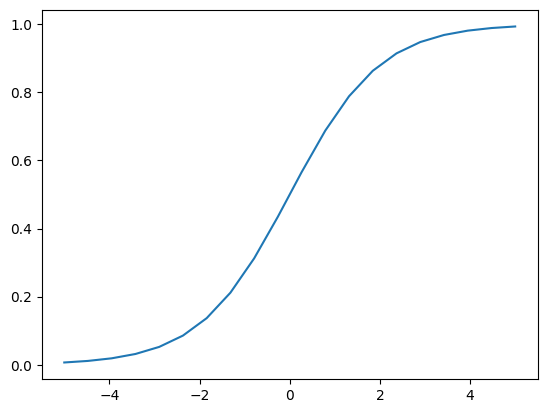

In [51]:
plt.plot(z,sigmoid(z))

In [52]:
def linear_regression(xi):
    result = w0
    
    for j in range(len(w)):
        result = result + xi[j] * w[j]
        
    return result


def logistic_regression(xi):
    score = w0
    
    for j in range(len(w)):
        score = score + xi[j] * w[j]
        
    result = sigmoid(score)
    return result

3.9 Training logistic regression with scikit-Learn

Train model

In [58]:
from sklearn.linear_model import LogisticRegression

In [96]:
model = LogisticRegression(max_iter=len(X_train[0])*10)
# solver='lbfgs' is the default solver in newer version of sklearn
# for older versions, you need to specify it explicitly
model.fit(X_train, y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 450 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=450).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,450
,multi_class,'deprecated'


In [97]:
model.coef_[0].round(3)

array([ 0.632, -0.046, -0.716, -0.038, -0.092,  0.051, -0.109, -0.072,
       -0.047, -0.084, -0.386,  0.365, -0.109,  0.003, -0.252,  0.129,
       -0.008,  0.057, -0.109, -0.078,  0.218, -0.109, -0.239, -0.255,
        0.125, -0.128, -0.002, -0.106, -0.054,  0.069, -0.04 ,  0.129,
       -0.259,  0.199, -0.105, -0.109,  0.084, -0.067, -0.109,  0.046,
        0.17 , -0.109, -0.191, -0.066,  0.   ])

In [98]:
y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

np.float64(0.8041163946061036)

In [99]:
(y_val == churn_decision).mean()

np.float64(0.8041163946061036)

In [100]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [101]:
df_pred['correct'] = df_pred.prediction == df_pred.actual
df_pred.correct.mean()

np.float64(0.8041163946061036)

3.10 Model interpretation

In [102]:
a = [1,2,3,4]
b= 'abcd'
dict(zip(a,b))

{1: 'a', 2: 'b', 3: 'c', 4: 'd'}

In [103]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': np.float64(0.632),
 'contract=one_year': np.float64(-0.046),
 'contract=two_year': np.float64(-0.716),
 'dependents=no': np.float64(-0.038),
 'dependents=yes': np.float64(-0.092),
 'deviceprotection=no': np.float64(0.051),
 'deviceprotection=no_internet_service': np.float64(-0.109),
 'deviceprotection=yes': np.float64(-0.072),
 'gender=female': np.float64(-0.047),
 'gender=male': np.float64(-0.084),
 'internetservice=dsl': np.float64(-0.386),
 'internetservice=fiber_optic': np.float64(0.365),
 'internetservice=no': np.float64(-0.109),
 'monthlycharges': np.float64(0.003),
 'multiplelines=no': np.float64(-0.252),
 'multiplelines=no_phone_service': np.float64(0.129),
 'multiplelines=yes': np.float64(-0.008),
 'onlinebackup=no': np.float64(0.057),
 'onlinebackup=no_internet_service': np.float64(-0.109),
 'onlinebackup=yes': np.float64(-0.078),
 'onlinesecurity=no': np.float64(0.218),
 'onlinesecurity=no_internet_service': np.float64(-0.109),
 'onlinesecurity=ye

In [104]:
small = ['contract', 'tenure', 'monthlycharges']

df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [105]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [106]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [107]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [108]:
X_train_small = dv_small.transform(dicts_train_small)
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [109]:
W0 = model_small.intercept_[0]
W0

np.float64(-2.477957595829565)

In [110]:
w = model_small.coef_[0]
w.round(3)

array([ 0.971, -0.024, -0.948,  0.027, -0.036])

In [111]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': np.float64(0.971),
 'contract=one_year': np.float64(-0.024),
 'contract=two_year': np.float64(-0.948),
 'monthlycharges': np.float64(0.027),
 'tenure': np.float64(-0.036)}

In [112]:
W0 + (-0.971) + 30 * 0.027 + 24 * (-0.036)

np.float64(-3.502957595829565)

In [113]:
sigmoid(W0 + (-0.971) + 30 * 0.027 + 24 * (-0.036))

np.float64(0.029228195254015973)